In [1]:
%cd /home/josh/PycharmProjects/Muon_magnets

/home/josh/PycharmProjects/Muon_magnets


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time

import modules.functions as func
from modules.muon import Muon
from modules.ensemble import Ensemble

from modules.dipole import Dipole
from modules.island import Island
from modules.grid import Grid
#from modules.field_grid import make_field
from modules.multi_process import MP_fields
from modules.model_equations import static_GKT

%matplotlib inline

#### Used to create grid of points to calculte field at
In the final code the field will instead be calcualted for each muon using the muons x,y,z position

In [3]:
def setup_field(width, height, nx, ny):
    """
    :param tuple max_loc: (X, Y) of furthest dipole
    :param float edge_buffer: Distance around edge of grid to calculate field for
    :param int nx: Number of field x points
    :param int ny: Number of field y points
    :rtype: dict
    :return: Dictionary containing coordinates for a field over the dipole array
    """
    edge_buffer_x = width/10
    edge_buffer_y = height/10
    # Determine region to calculate field lines/plot over
    field_region = [[(-width/2) - edge_buffer_x, (width/2) + edge_buffer_x],
                    [(-height/2) - edge_buffer_y, (height/2) + edge_buffer_y]]
    field_locations = {"x_vals": np.linspace(*field_region[0], nx),
                       "y_vals": np.linspace(*field_region[1], ny)}
    return field_locations

In [10]:
field_locations = setup_field(200e-6, 200e-6, 200, 200)

x_locs = field_locations["x_vals"]
y_locs = field_locations["y_vals"]

x_len, y_len = len(x_locs), len(y_locs)

Ex = np.zeros([x_len, y_len])
Ey = np.zeros([x_len, y_len])

In [5]:
island_grid = Grid()

Setting up grid parameters...
Creating islands...
Saving islands...
Saving pickle to data/15X15_U_6/grid_obj.pickle
Finished.


## Calculate resultant field over the whole grid

In [11]:
for i, x in enumerate(x_locs):
    print(f"{i}/{len(x_locs)} started...")
    for j, y in enumerate(y_locs):
        for isle in island_grid.islands:
            ex, ey, _ = isle.get_mag_field([x, y, 10e-6])
            Ex[j][i] += ex
            Ey[j][i] += ey

0/200 started...
1/200 started...
2/200 started...
3/200 started...
4/200 started...
5/200 started...
6/200 started...
7/200 started...
8/200 started...
9/200 started...
10/200 started...
11/200 started...
12/200 started...
13/200 started...
14/200 started...
15/200 started...
16/200 started...
17/200 started...
18/200 started...
19/200 started...
20/200 started...
21/200 started...
22/200 started...
23/200 started...
24/200 started...
25/200 started...
26/200 started...
27/200 started...
28/200 started...
29/200 started...
30/200 started...
31/200 started...
32/200 started...
33/200 started...
34/200 started...
35/200 started...
36/200 started...
37/200 started...
38/200 started...
39/200 started...
40/200 started...
41/200 started...
42/200 started...
43/200 started...
44/200 started...
45/200 started...
46/200 started...
47/200 started...
48/200 started...
49/200 started...
50/200 started...
51/200 started...
52/200 started...
53/200 started...
54/200 started...
55/200 started...
56

## Plotting

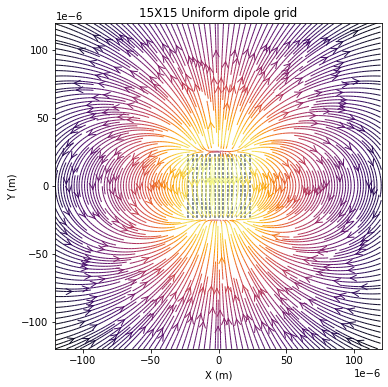

In [12]:
color = 2 * np.log(np.hypot(Ex, Ey))

fig, ax = plt.subplots(figsize=(8, 6))
ax.streamplot(x_locs, y_locs, Ex, Ey,
              color=color,
              linewidth=1,
              cmap=plt.cm.inferno,
              density=4,
              arrowstyle='->',
              arrowsize=1.5)
ax.set_aspect("equal")
for isle in island_grid.islands:
  ax.add_artist(isle.get_outline())
  ax.add_artist(isle.get_moment_arrow())


ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_title("15X15 Uniform dipole grid")

ax.set_xlim(min(x_locs), max(x_locs))
ax.set_ylim(min(y_locs), max(y_locs))
ax.ticklabel_format(axis="both", style="sci", scilimits=(-6, -6))
plt.show()